## MELBOURNE HOUSING PRICES

In [229]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  1.0. Importing and Exploring Data

In [230]:
housing = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/melbourne-housing-market/Melbourne_housing_FULL.csv')

In [231]:
housing.shape

(34857, 21)

In [232]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [233]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

###  1.1. Identifying null values 

In [234]:
# Identifying null values
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [235]:
# Percentage of null values
p = housing.isnull().sum()/ len(housing)*100
pd.Series.sort_values(p, ascending=False)

BuildingArea     60.576068
YearBuilt        55.386293
Landsize         33.881286
Car              25.039447
Bathroom         23.599277
Bedroom2         23.573457
Longtitude       22.882061
Lattitude        22.882061
Price            21.832057
Regionname        0.008607
Propertycount     0.008607
CouncilArea       0.008607
Postcode          0.002869
Distance          0.002869
Date              0.000000
SellerG           0.000000
Method            0.000000
Type              0.000000
Rooms             0.000000
Address           0.000000
Suburb            0.000000
dtype: float64

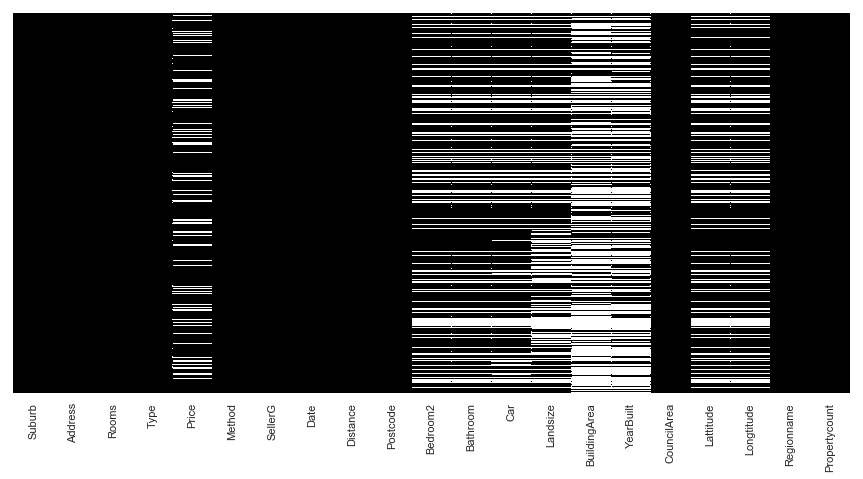

In [236]:
# Visualize missing values
plt.subplots(figsize=(15,7))
sns.set(font_scale=1)
sns.heatmap(housing.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r', label='')
plt.show()

In [237]:
# Dropping all null values
housing = housing.dropna()

In [238]:
housing.shape

(8887, 21)

###  1.2. Identifying Data Types 

##### a. Updating  Date

In [239]:
# Converting 'Date' column to date object
housing['Date'] = pd.to_datetime(housing['Date'])
housing['year'], housing['month'], housing['day'] = housing['Date'].dt.year, housing['Date'].dt.month, housing['Date'].dt.day

##### b. Updating 'Postcode'

In [240]:
# Removing full stop from the 'Postcode' column
housing['Postcode'] = housing['Postcode'].astype(str)
housing['Postcode'] = housing['Postcode'].str.replace('.', '')

# Changing back the 'Postcode' column back to object
housing['Postcode'] = housing['Postcode'].astype('object')

##### c. Listing all objects

In [241]:
# Getting a list of all the objects
categorical = housing.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print((i))
    print(column.nunique())

Suburb
315
Address
8764
Type
3
Method
5
SellerG
250
Postcode
194
CouncilArea
33
Regionname
8


##### d. Listing all floats

In [242]:
# Getting a list of all the floats
categorical = housing.select_dtypes(include=['float'])
for i in categorical:
    column = categorical[i]
    print((i))
    print(column.nunique())

Price
1846
Distance
201
Bedroom2
12
Bathroom
9
Car
11
Landsize
1237
BuildingArea
593
YearBuilt
143
Lattitude
5661
Longtitude
6070
Propertycount
312


##### e. Changing 'year', 'day', 'month' to object

In [243]:
# Changing dtype to object so we can create dummy variables
housing['year']= housing.year.astype(object)
housing['day']= housing.day.astype(object)
housing['month']= housing.month.astype(object)
# housing['YearBuilt']=housing.YearBuilt.astype(object)

##### f. Changing floats to integers where required

In [244]:
Integers = ['Rooms','Bedroom2','Bathroom', 'Car', 'YearBuilt','Landsize', 'Propertycount',\
            'BuildingArea']

In [245]:
for column in Integers:
    housing[Integers] = housing[Integers].astype(int)

In [246]:
# Verifying all dtypes
housing.dtypes

Suburb                   object
Address                  object
Rooms                     int32
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                  int32
Bathroom                  int32
Car                       int32
Landsize                  int32
BuildingArea              int32
YearBuilt                 int32
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int32
year                     object
month                    object
day                      object
dtype: object

In [247]:
# Drop columns with many unique variables to creat dummy variables
# housing.drop(['Address','SellerG'], 1, inplace=True)

###  1.3. Abbreviating region names 

In [248]:
housing.Regionname.value_counts()

Southern Metropolitan         2707
Northern Metropolitan         2612
Western Metropolitan          2059
Eastern Metropolitan           982
South-Eastern Metropolitan     371
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

In [249]:
# Abbreviate Regionname categories
housing['Regionname'] = housing['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

###  1.4. Data Exploration 

In [250]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3.078204,1.646450,1.692247,523.480365,149.301339,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,0.966269,0.721611,0.975464,1061.324228,87.926718,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


##### Data exploration using mean values for 'Regions'

In [251]:
Z = housing.groupby('Regionname').mean().reset_index()

In [252]:
Z

,Regionname,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,E Metro,3.495927,1.157120e+06,14.711609,3.486762,1.857434,1.904277,659.467413,173.430754,1972.599796,-37.794489,145.143813,6062.042770
1,E Vic,3.470588,6.618428e+05,35.292157,3.470588,1.725490,1.921569,990.490196,170.764706,1983.627451,-37.974168,145.326458,9216.058824
2,N Metro,2.892420,8.778521e+05,9.391424,2.878637,1.471286,1.544028,445.184916,128.119066,1964.372129,-37.733861,144.980604,9315.810490
3,N Vic,3.467742,5.990403e+05,32.516129,3.467742,1.838710,2.145161,2669.354839,164.774194,1992.693548,-37.603580,144.859854,4724.741935
4,S Metro,3.039158,1.493323e+06,8.918877,3.007388,1.746214,1.635020,493.237532,159.347248,1958.706317,-37.868548,145.035930,7482.845586
5,SE Metro,3.433962,9.227159e+05,25.041509,3.428571,1.716981,2.037736,618.237197,159.576819,1976.929919,-38.005688,145.146726,6915.110512
6,W Metro,3.158329,8.783672e+05,10.678485,3.133560,1.619718,1.764449,500.264206,148.942205,1969.945119,-37.782565,144.850289,6016.701311
7,W Vic,3.627907,4.458023e+05,30.686047,3.627907,1.488372,2.093023,723.976744,133.302326,1979.744186,-37.695156,144.570897,4184.813953


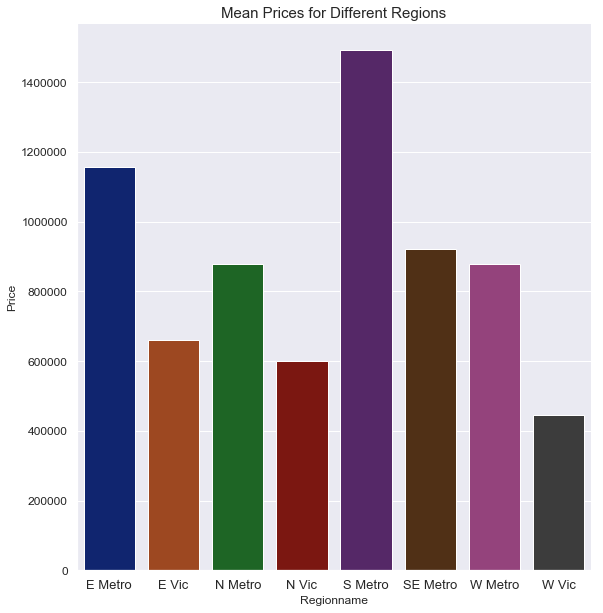

In [253]:
# plotting mean prices for different regions
sns.set(style="darkgrid")

g = sns.catplot(x= 'Regionname', y='Price', data=Z,
                   height=8.5, kind="bar", palette="dark", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=0, fontsize=13)
g.set_yticklabels(fontsize=12)
plt.title('Mean Prices for Different Regions',fontsize=15)
plt.show()

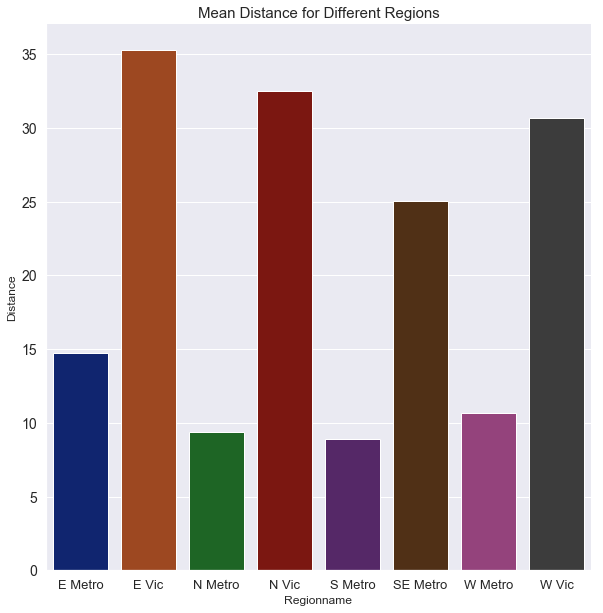

In [254]:
# plotting mean distance for different regions
sns.set(style="darkgrid")

g = sns.catplot(x= 'Regionname', y='Distance', data=Z,
                   height=8.5, kind="bar", palette="dark", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=0, fontsize=13)
g.set_yticklabels(fontsize=14)
plt.title('Mean Distance for Different Regions',fontsize=15)
plt.show()

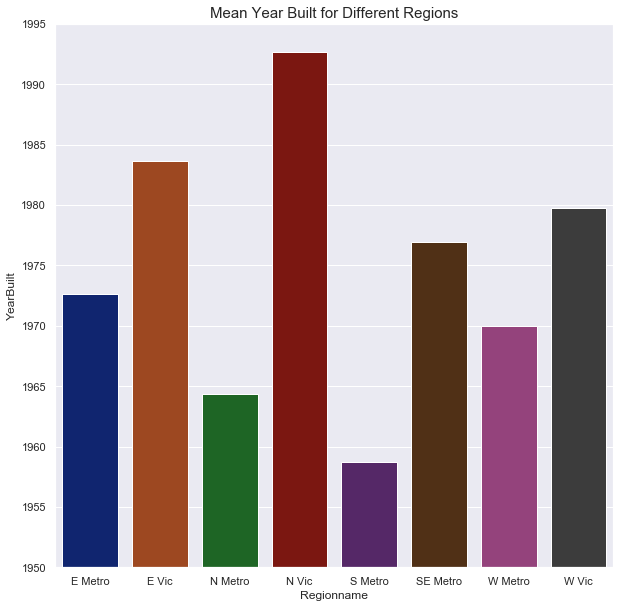

In [255]:
# plotting mean year of built for different regions
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

sns.barplot(x= 'Regionname', y='YearBuilt', data=Z, palette='dark')
plt.ylim(1950,1995)
plt.title('Mean Year Built for Different Regions',fontsize=15)
plt.show()

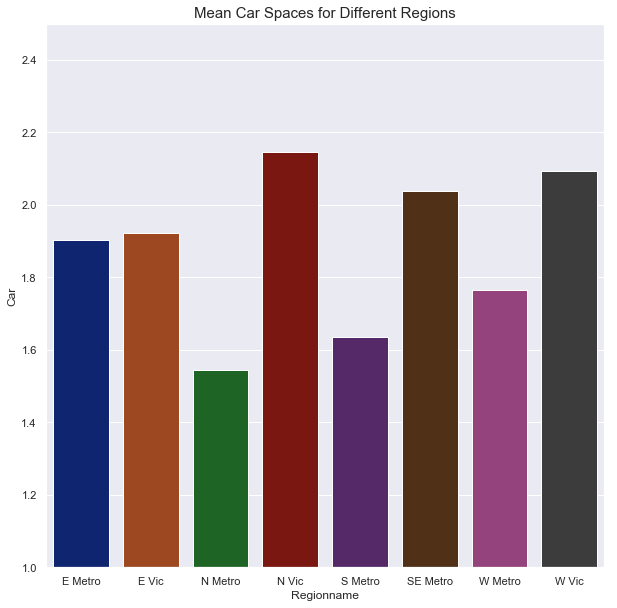

In [256]:
# plotting mean car spaces for different regions
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

sns.barplot(x= 'Regionname', y='Car', data=Z, palette='dark')
plt.ylim(1,2.5)
plt.title('Mean Car Spaces for Different Regions',fontsize=15)
plt.show()

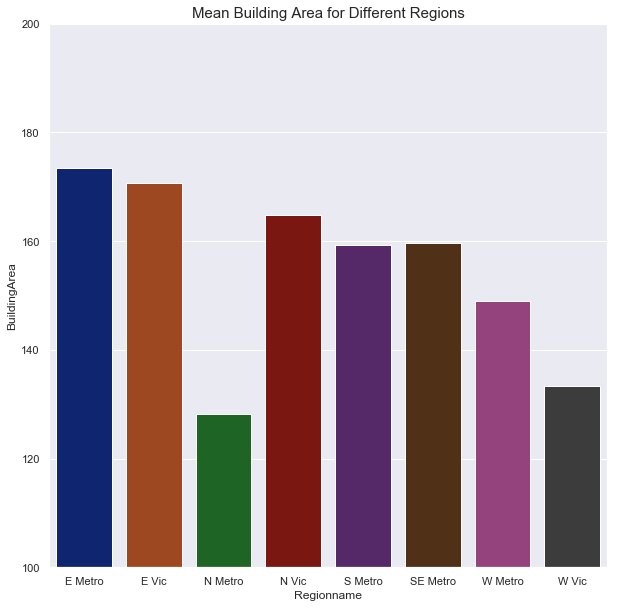

In [257]:
# plotting mean building area for different regions
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

sns.barplot(x= 'Regionname', y='BuildingArea', data=Z, palette='dark')
plt.ylim(100,200)
plt.title('Mean Building Area for Different Regions',fontsize=15)
plt.show()

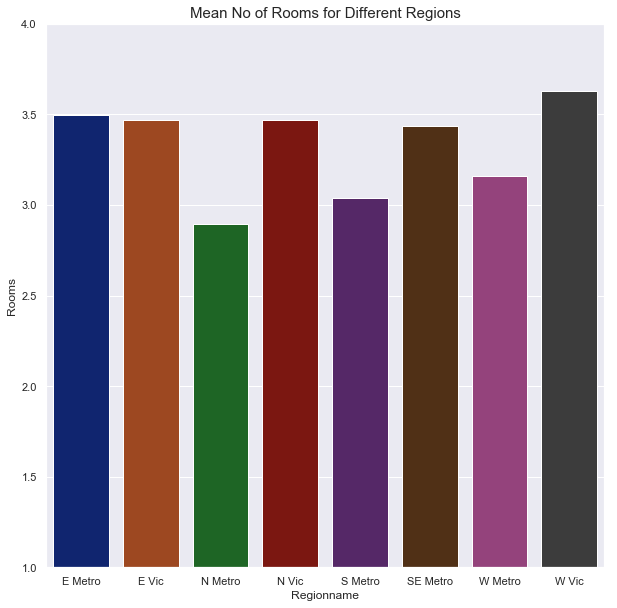

In [258]:
# plotting mean building area for different regions
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

sns.barplot(x= 'Regionname', y='Rooms', data=Z, palette='dark')
plt.ylim(1,4)
plt.title('Mean No of Rooms for Different Regions',fontsize=15)
plt.show()

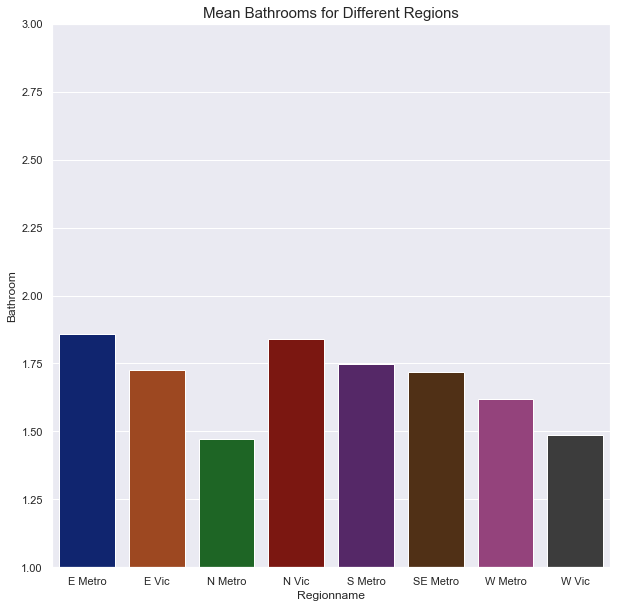

In [259]:
# plotting mean building area for different regions
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))

sns.barplot(x= 'Regionname', y='Bathroom', data=Z, palette='dark')
plt.ylim(1,3)
plt.title('Mean Bathrooms for Different Regions',fontsize=15)
plt.show()

###  1.5. Visualizing Correlation 

In [260]:
list(housing.columns)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'year',
 'month',
 'day']

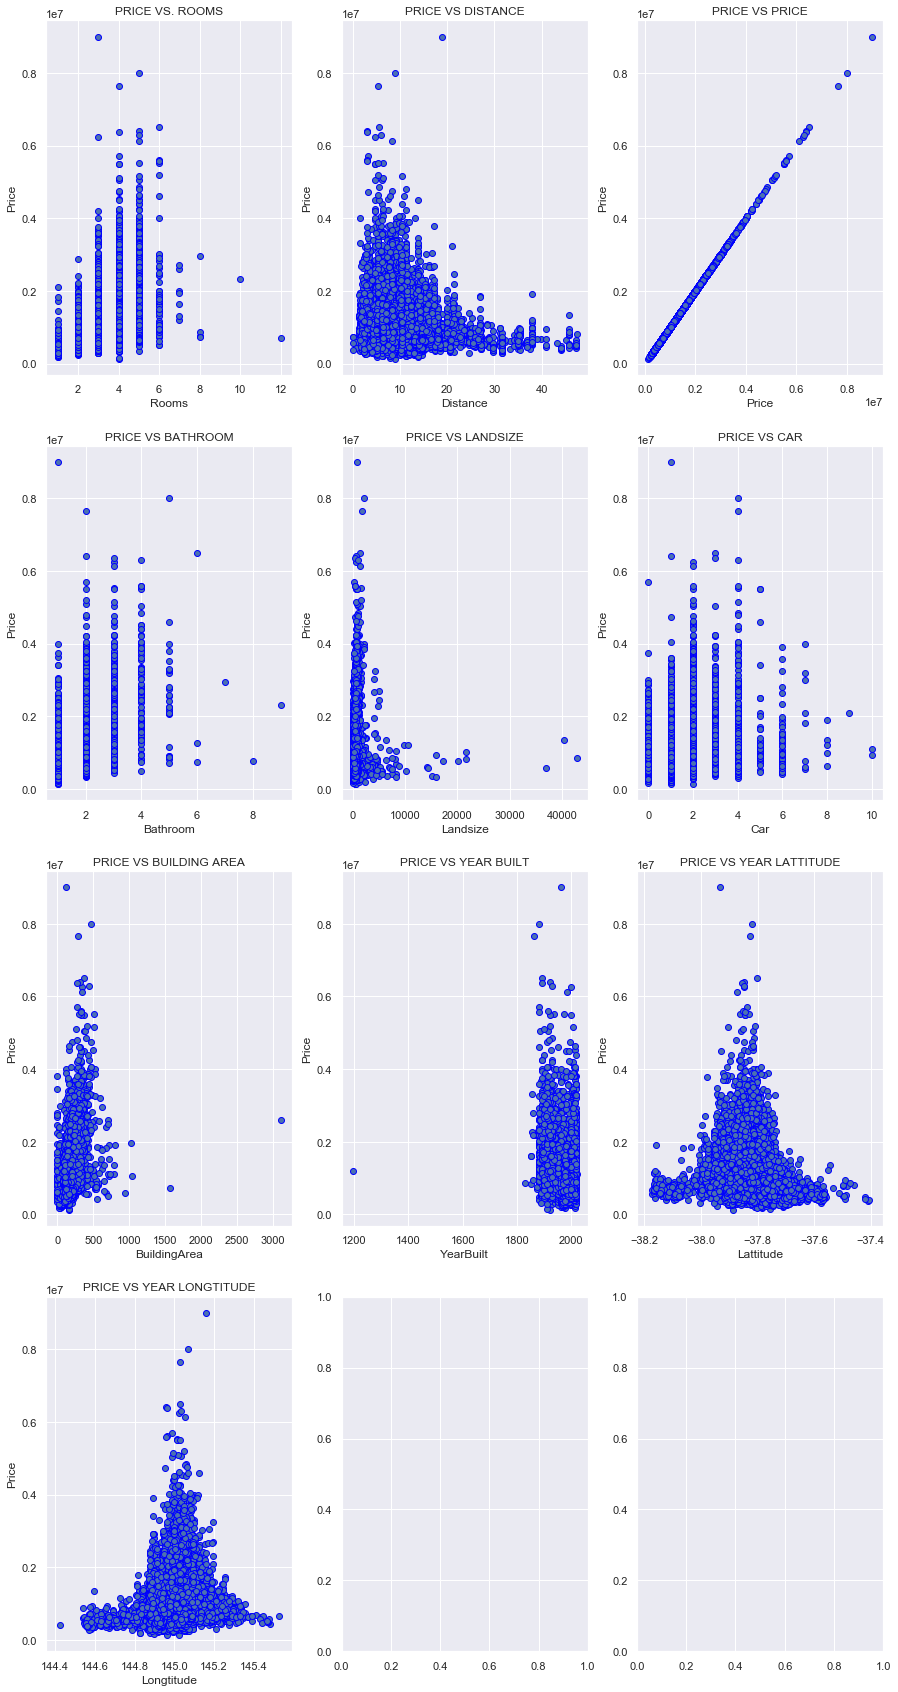

In [261]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,3, figsize = (15,30))

# axes[0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = housing, edgecolor = 'blue')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('PRICE VS. ROOMS')

# axes[0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = housing, edgecolor = 'blue')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('PRICE VS DISTANCE')

axes[0,2].scatter(x = 'Price', y = 'Price', data = housing, edgecolor = 'blue')
axes[0,2].set_xlabel('Price')
axes[0,2].set_ylabel('Price')
axes[0,2].set_title('PRICE VS PRICE')

axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = housing, edgecolor = 'blue')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('PRICE VS BATHROOM')

axes[1,1].scatter(x = 'Landsize', y = 'Price', data = housing, edgecolor = 'blue')
axes[1,1].set_xlabel('Landsize')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('PRICE VS LANDSIZE')

axes[1,2].scatter(x = 'Car', y = 'Price', data = housing, edgecolor = 'blue')
axes[1,2].set_xlabel('Car')
axes[1,2].set_ylabel('Price')
axes[1,2].set_title('PRICE VS CAR')

axes[2,0].scatter(x = 'BuildingArea', y = 'Price', data = housing, edgecolor = 'blue')
axes[2,0].set_xlabel('BuildingArea')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('PRICE VS BUILDING AREA')

axes[2,1].scatter(x = 'YearBuilt', y = 'Price', data = housing, edgecolor = 'blue')
axes[2,1].set_xlabel('YearBuilt')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('PRICE VS YEAR BUILT')

axes[2,2].scatter(x = 'Lattitude', y = 'Price', data = housing, edgecolor = 'blue')
axes[2,2].set_xlabel('Lattitude')
axes[2,2].set_ylabel('Price')
axes[2,2].set_title('PRICE VS YEAR LATTITUDE')

axes[3,0].scatter(x = 'Longtitude', y = 'Price', data = housing, edgecolor = 'blue')
axes[3,0].set_xlabel('Longtitude')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('PRICE VS YEAR LONGTITUDE')

plt.show()




##### a. Heat map

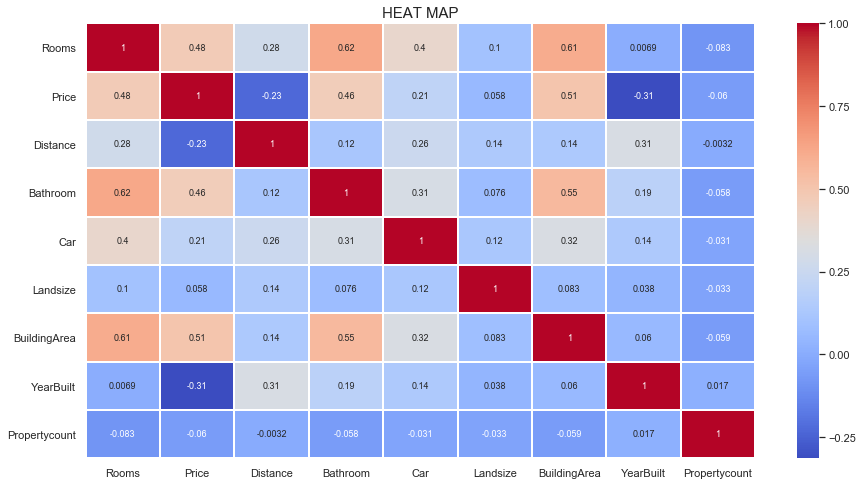

In [262]:
# plotting a heat map for all numeric variables
plt.figure(figsize=(15,8))
sns.heatmap(housing[['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Propertycount']].corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('HEAT MAP', fontsize=15)
plt.show()

##### b. Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D9AC5F4A8>,
      dtype=object)

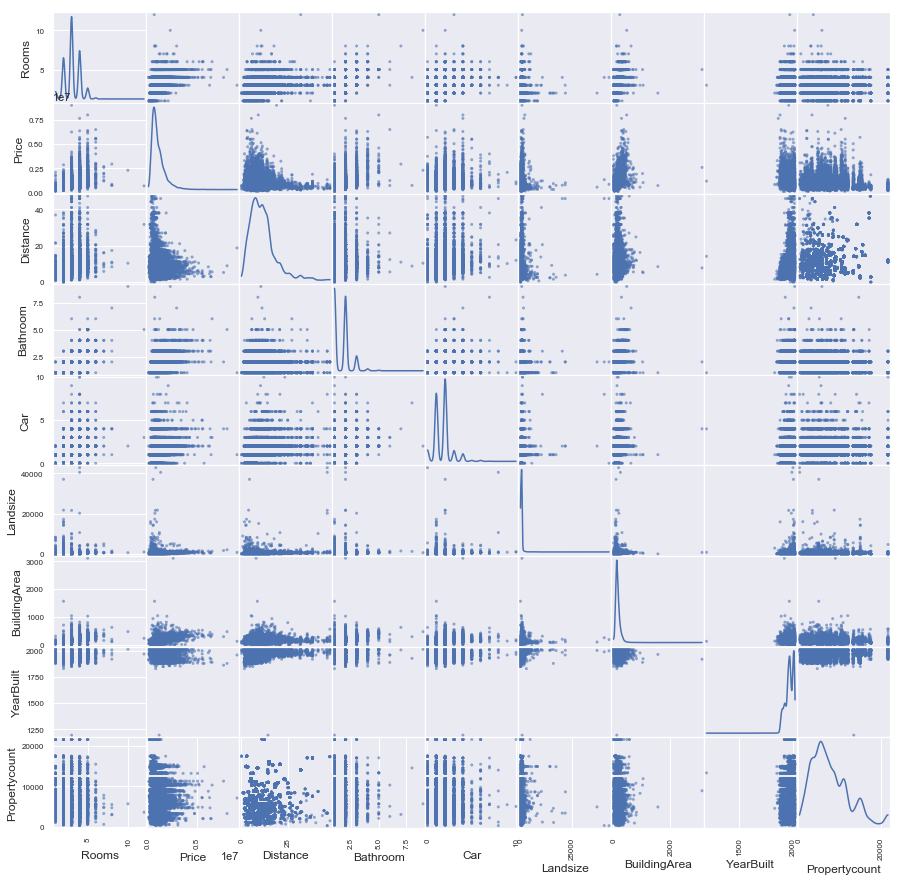

In [263]:
# creating a 'scatter matrix' for all numeric variables
pd.scatter_matrix(housing[[
 'Rooms',
 'Price',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Propertycount']],alpha=0.6, figsize=(15,15), diagonal='kde')

##### b. Pair Plot

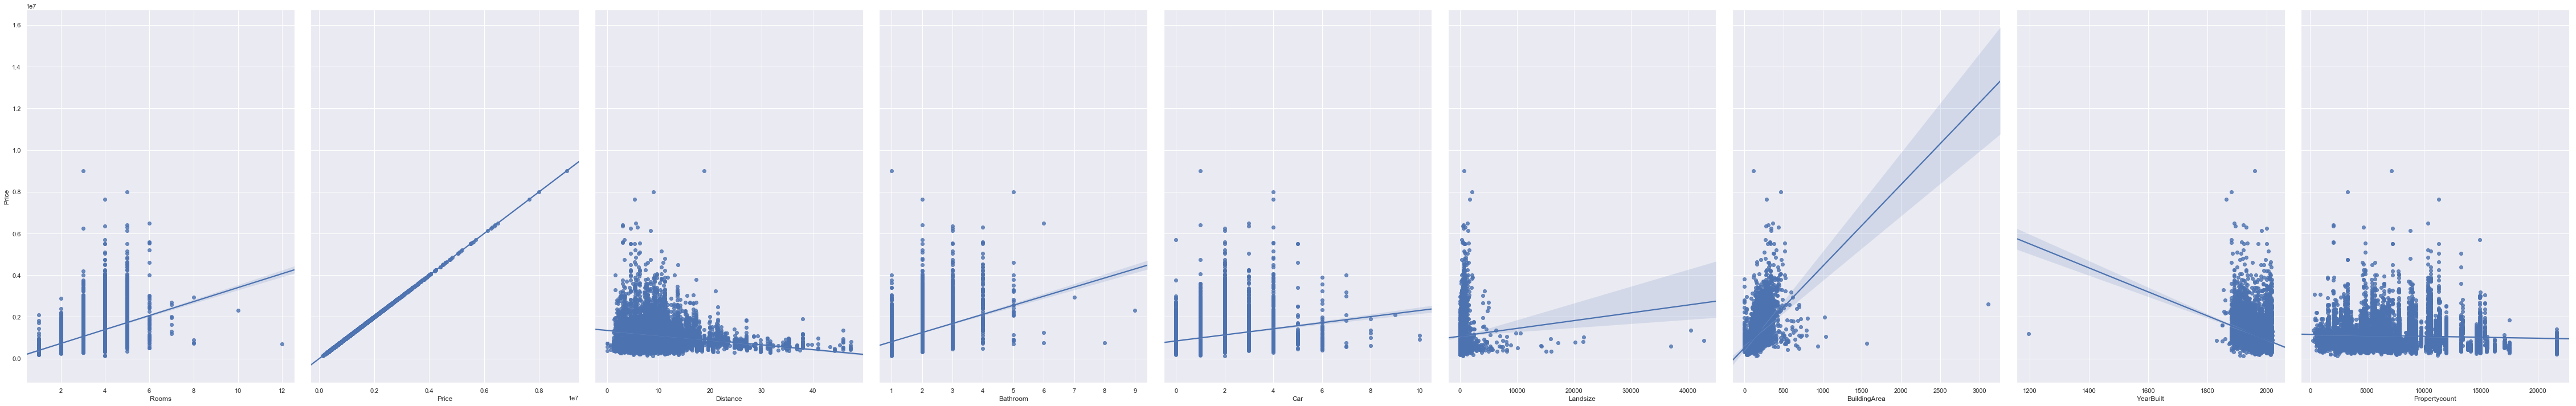

In [264]:
# Creating pairplots for numeric variables vs. Price.
sns.pairplot(housing, x_vars=['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
 'Propertycount'], y_vars='Price', aspect=0.7, kind='reg', height=10)
plt.show()

###  1.6. Histogram Visualizations 

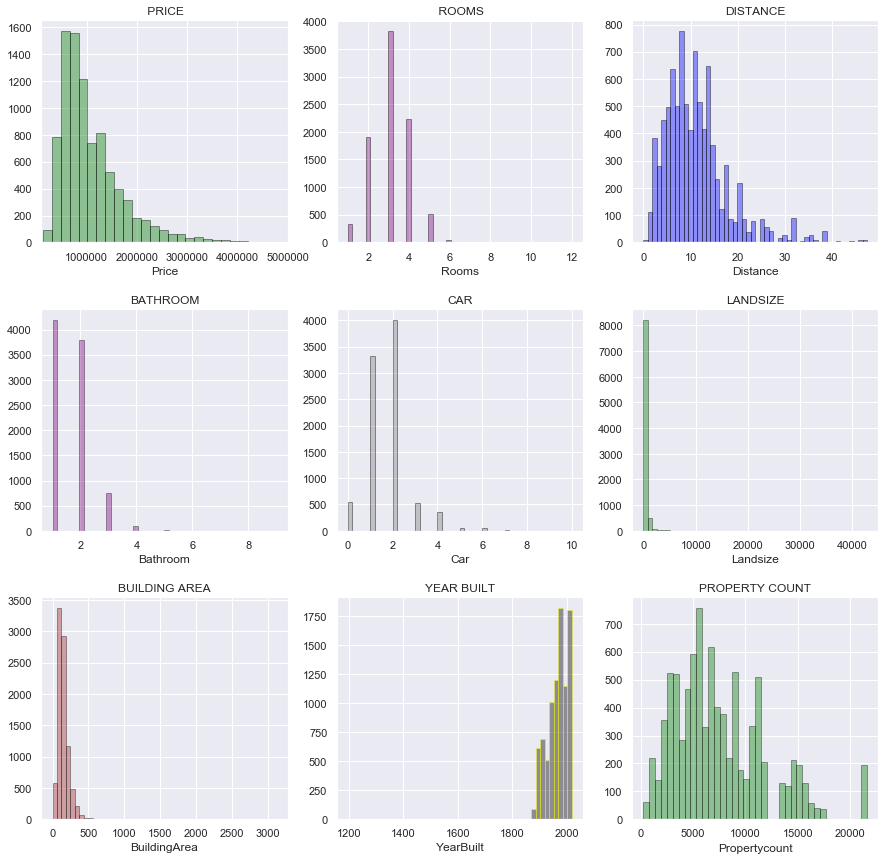

In [265]:
# Histogram for all numeric variables

sns.set_style('darkgrid')

plt.figure(figsize=(15,20))

plt.subplot(4,3,1)
sns.distplot(housing['Price'], kde = False, hist_kws=dict(edgecolor="black"), color='green').set(xlim=(100000, 5000000))
plt.title(' PRICE')

plt.subplot(4,3,2)
sns.distplot(housing['Rooms'], kde = False, hist_kws=dict(edgecolor="black"), color='purple')
plt.title(' ROOMS')

plt.subplot(4,3,3)
sns.distplot(housing['Distance'], kde = False, hist_kws=dict(edgecolor="black"), color='blue')
plt.title('DISTANCE')

plt.subplot(4,3,4)
sns.distplot(housing['Bathroom'], kde = False, hist_kws=dict(edgecolor="k"), color='purple')
plt.title('BATHROOM')

plt.subplot(4,3,5)
sns.distplot(housing['Car'], kde = False, hist_kws=dict(edgecolor="black"), color='grey')
plt.title('CAR')

plt.subplot(4,3,6)
sns.distplot(housing['Landsize'], kde = False, hist_kws=dict(edgecolor="k"), color='green')
plt.title('LANDSIZE')

plt.subplot(4,3,7)
sns.distplot(housing['BuildingArea'], kde = False, hist_kws=dict(edgecolor="k"), color='brown')
plt.title('BUILDING AREA')

plt.subplot(4,3,8)
sns.distplot(housing['YearBuilt'], kde = False, hist_kws=dict(edgecolor="yellow"), color='black')
plt.title('YEAR BUILT')

plt.subplot(4,3,9)
sns.distplot(housing['Propertycount'], kde = False, hist_kws=dict(edgecolor="k"), color='green')
plt.title('PROPERTY COUNT')

plt.subplots_adjust(hspace=0.3)
plt.show()

### 1.7. Boxplot Visualizations 

In [266]:
list(housing.columns)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'year',
 'month',
 'day']

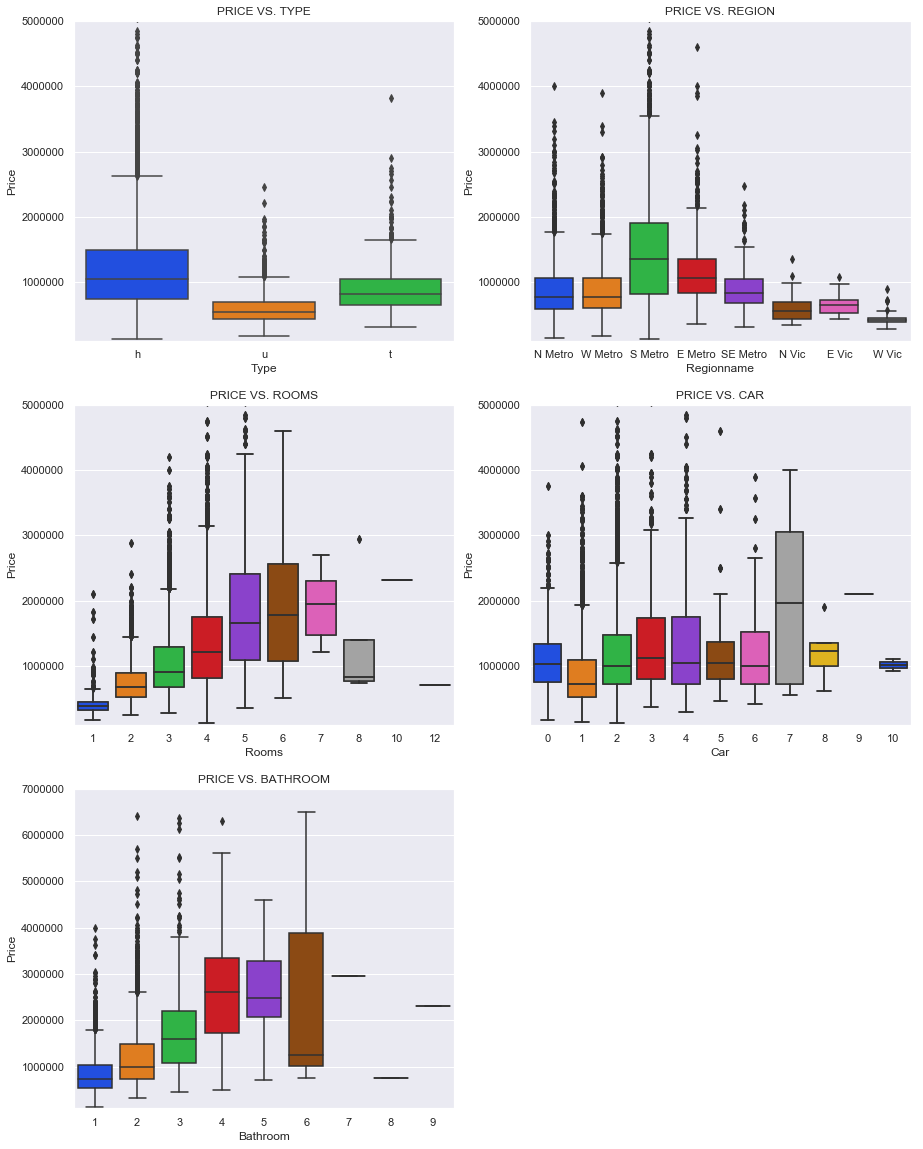

In [267]:
sns.set_style('darkgrid')

plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.boxplot(data=housing, x = 'Type', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. TYPE')

plt.subplot(3,2,2)
sns.boxplot(data=housing, x = 'Regionname', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. REGION')

plt.subplot(3,2,3)
sns.boxplot(data=housing, x = 'Rooms', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. ROOMS')

plt.subplot(3,2,4)
sns.boxplot(data=housing, x = 'Car', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. CAR')

plt.subplot(3,2,3)
sns.boxplot(data=housing, x = 'Rooms', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. ROOMS')

plt.subplot(3,2,4)
sns.boxplot(data=housing, x = 'Car', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. CAR')

plt.subplot(3,2,5)
sns.boxplot(data=housing, x = 'Bathroom', y='Price', palette='bright')
plt.ylim(100000,7000000)
plt.title('PRICE VS. BATHROOM')

plt.show()

###  2.0. Creating Dummy Variables 

In [268]:
list(housing.select_dtypes('object'))

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Postcode',
 'CouncilArea',
 'Regionname',
 'year',
 'month',
 'day']

In [269]:
# Getting a list of all the objects
categorical = housing.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Suburb
315
Address
8764
Type
3
Method
5
SellerG
250
Postcode
194
CouncilArea
33
Regionname
8
year
3
month
12
day
30


##### a. Creating Dummies

In [270]:
# Did not create dummy variables for 'Method','Council Area','year','month', day

dummies = pd.get_dummies(housing[['Type','Postcode','Regionname']])
y = housing['Price']

In [271]:
dummies.head()

,Type_h,Type_t,Type_u,Postcode_30000,Postcode_30020,Postcode_30030,Postcode_30060,Postcode_30110,Postcode_30120,Postcode_30130,...,Postcode_39760,Postcode_39770,Regionname_E Metro,Regionname_E Vic,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,Regionname_W Vic
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### b. Concating dummy variables with housing data

In [272]:
housing=pd.concat([housing,dummies], axis=1)

In [273]:
housing.shape

(8887, 229)

In [274]:
housing.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Postcode_39760,Postcode_39770,Regionname_E Metro,Regionname_E Vic,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,Regionname_W Vic
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,30670,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,30670,...,0,0,0,0,1,0,0,0,0,0


##### b. Dropping unnecessary columns

In [275]:
housing.iloc[:,:].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Postcode_39760,Postcode_39770,Regionname_E Metro,Regionname_E Vic,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,Regionname_W Vic
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,30670,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,30670,...,0,0,0,0,1,0,0,0,0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,30670,...,0,0,0,0,1,0,0,0,0,0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,30670,...,0,0,0,0,1,0,0,0,0,0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,30670,...,0,0,0,0,1,0,0,0,0,0


In [276]:
# Assigning Features and Target Variables
X = housing.loc[:, ~housing.columns.isin(['Suburb', 'Price','Postcode','Method', 'CouncilArea','Bedroom2','Type'\
                                         ,'Address', 'SellerG','Date','Lattitude', 'Longtitude', 'Regionname'\
                                         ,'year','month','day'])]

In [277]:
y = housing['Price'] 

In [278]:
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Type_h,Type_t,...,Postcode_39760,Postcode_39770,Regionname_E Metro,Regionname_E Vic,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,Regionname_W Vic
2,2,2.5,1,0,156,79,1900,4019,1,0,...,0,0,0,0,1,0,0,0,0,0
4,3,2.5,2,0,134,150,1900,4019,1,0,...,0,0,0,0,1,0,0,0,0,0
6,4,2.5,1,2,120,142,2014,4019,1,0,...,0,0,0,0,1,0,0,0,0,0
11,3,2.5,2,0,245,210,1910,4019,1,0,...,0,0,0,0,1,0,0,0,0,0
14,2,2.5,1,2,256,107,1890,4019,1,0,...,0,0,0,0,1,0,0,0,0,0


In [279]:
list(X.columns)

['Rooms',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Propertycount',
 'Type_h',
 'Type_t',
 'Type_u',
 'Postcode_30000',
 'Postcode_30020',
 'Postcode_30030',
 'Postcode_30060',
 'Postcode_30110',
 'Postcode_30120',
 'Postcode_30130',
 'Postcode_30150',
 'Postcode_30160',
 'Postcode_30180',
 'Postcode_30190',
 'Postcode_30200',
 'Postcode_30210',
 'Postcode_30220',
 'Postcode_30230',
 'Postcode_30240',
 'Postcode_30250',
 'Postcode_30270',
 'Postcode_30280',
 'Postcode_30290',
 'Postcode_30300',
 'Postcode_30310',
 'Postcode_30320',
 'Postcode_30330',
 'Postcode_30340',
 'Postcode_30360',
 'Postcode_30370',
 'Postcode_30380',
 'Postcode_30390',
 'Postcode_30400',
 'Postcode_30410',
 'Postcode_30420',
 'Postcode_30430',
 'Postcode_30440',
 'Postcode_30460',
 'Postcode_30470',
 'Postcode_30480',
 'Postcode_30490',
 'Postcode_30510',
 'Postcode_30520',
 'Postcode_30530',
 'Postcode_30540',
 'Postcode_30550',
 'Postcode_30560',
 'Postcode_30570',
 'Post

In [280]:
# Verifying that there are no objects in the feature column for Linear Regression
categorical = X.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

###  2.0. Preprocessing and Train Test Split

##### Preprocessing

In [281]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()  
#X_scaled = sc.fit_transform(X)

##### Train Test Split

In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###  3.0. Model 1: Multiple Linear Regression 

#####  a. Importing and Fitting the Model 

In [283]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print('\nR²:',linreg.score(X_train, y_train))


R²: 0.7278989745433502


In [284]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 237039.28313678614
Mean squared Error: 166354198053.83524
Root Mean Squared Error: 407865.41659453703


In [285]:
# Coefficent Values for linear regression
feature_importance = linreg.coef_

##### b. Coefficent Estimates 

In [286]:
# Creating dataframe for Coefficients
coeff_linreg = pd.DataFrame(X.columns)
coeff_linreg['Coefficient Estimate'] = pd.Series(linreg.coef_)

# Renaming "single Column"
coeff_linreg = coeff_linreg.rename(columns = {0:'Variables'})

# sorting values by 'Coefficient Estimate'
coeff_linreg = coeff_linreg.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)

In [287]:
coeff_linreg

,Variables,Coefficient Estimate
0,Postcode_34310,1.227572e+06
1,Postcode_37560,1.159930e+06
2,Postcode_34370,1.000786e+06
3,Postcode_31990,9.653734e+05
4,Postcode_31980,9.136697e+05
5,Postcode_33400,8.150656e+05
6,Postcode_31260,8.054846e+05
7,Postcode_34290,7.666812e+05
8,Postcode_31970,7.617409e+05
9,Postcode_37570,7.484591e+05


##### c. Plotting Coefficent Values 

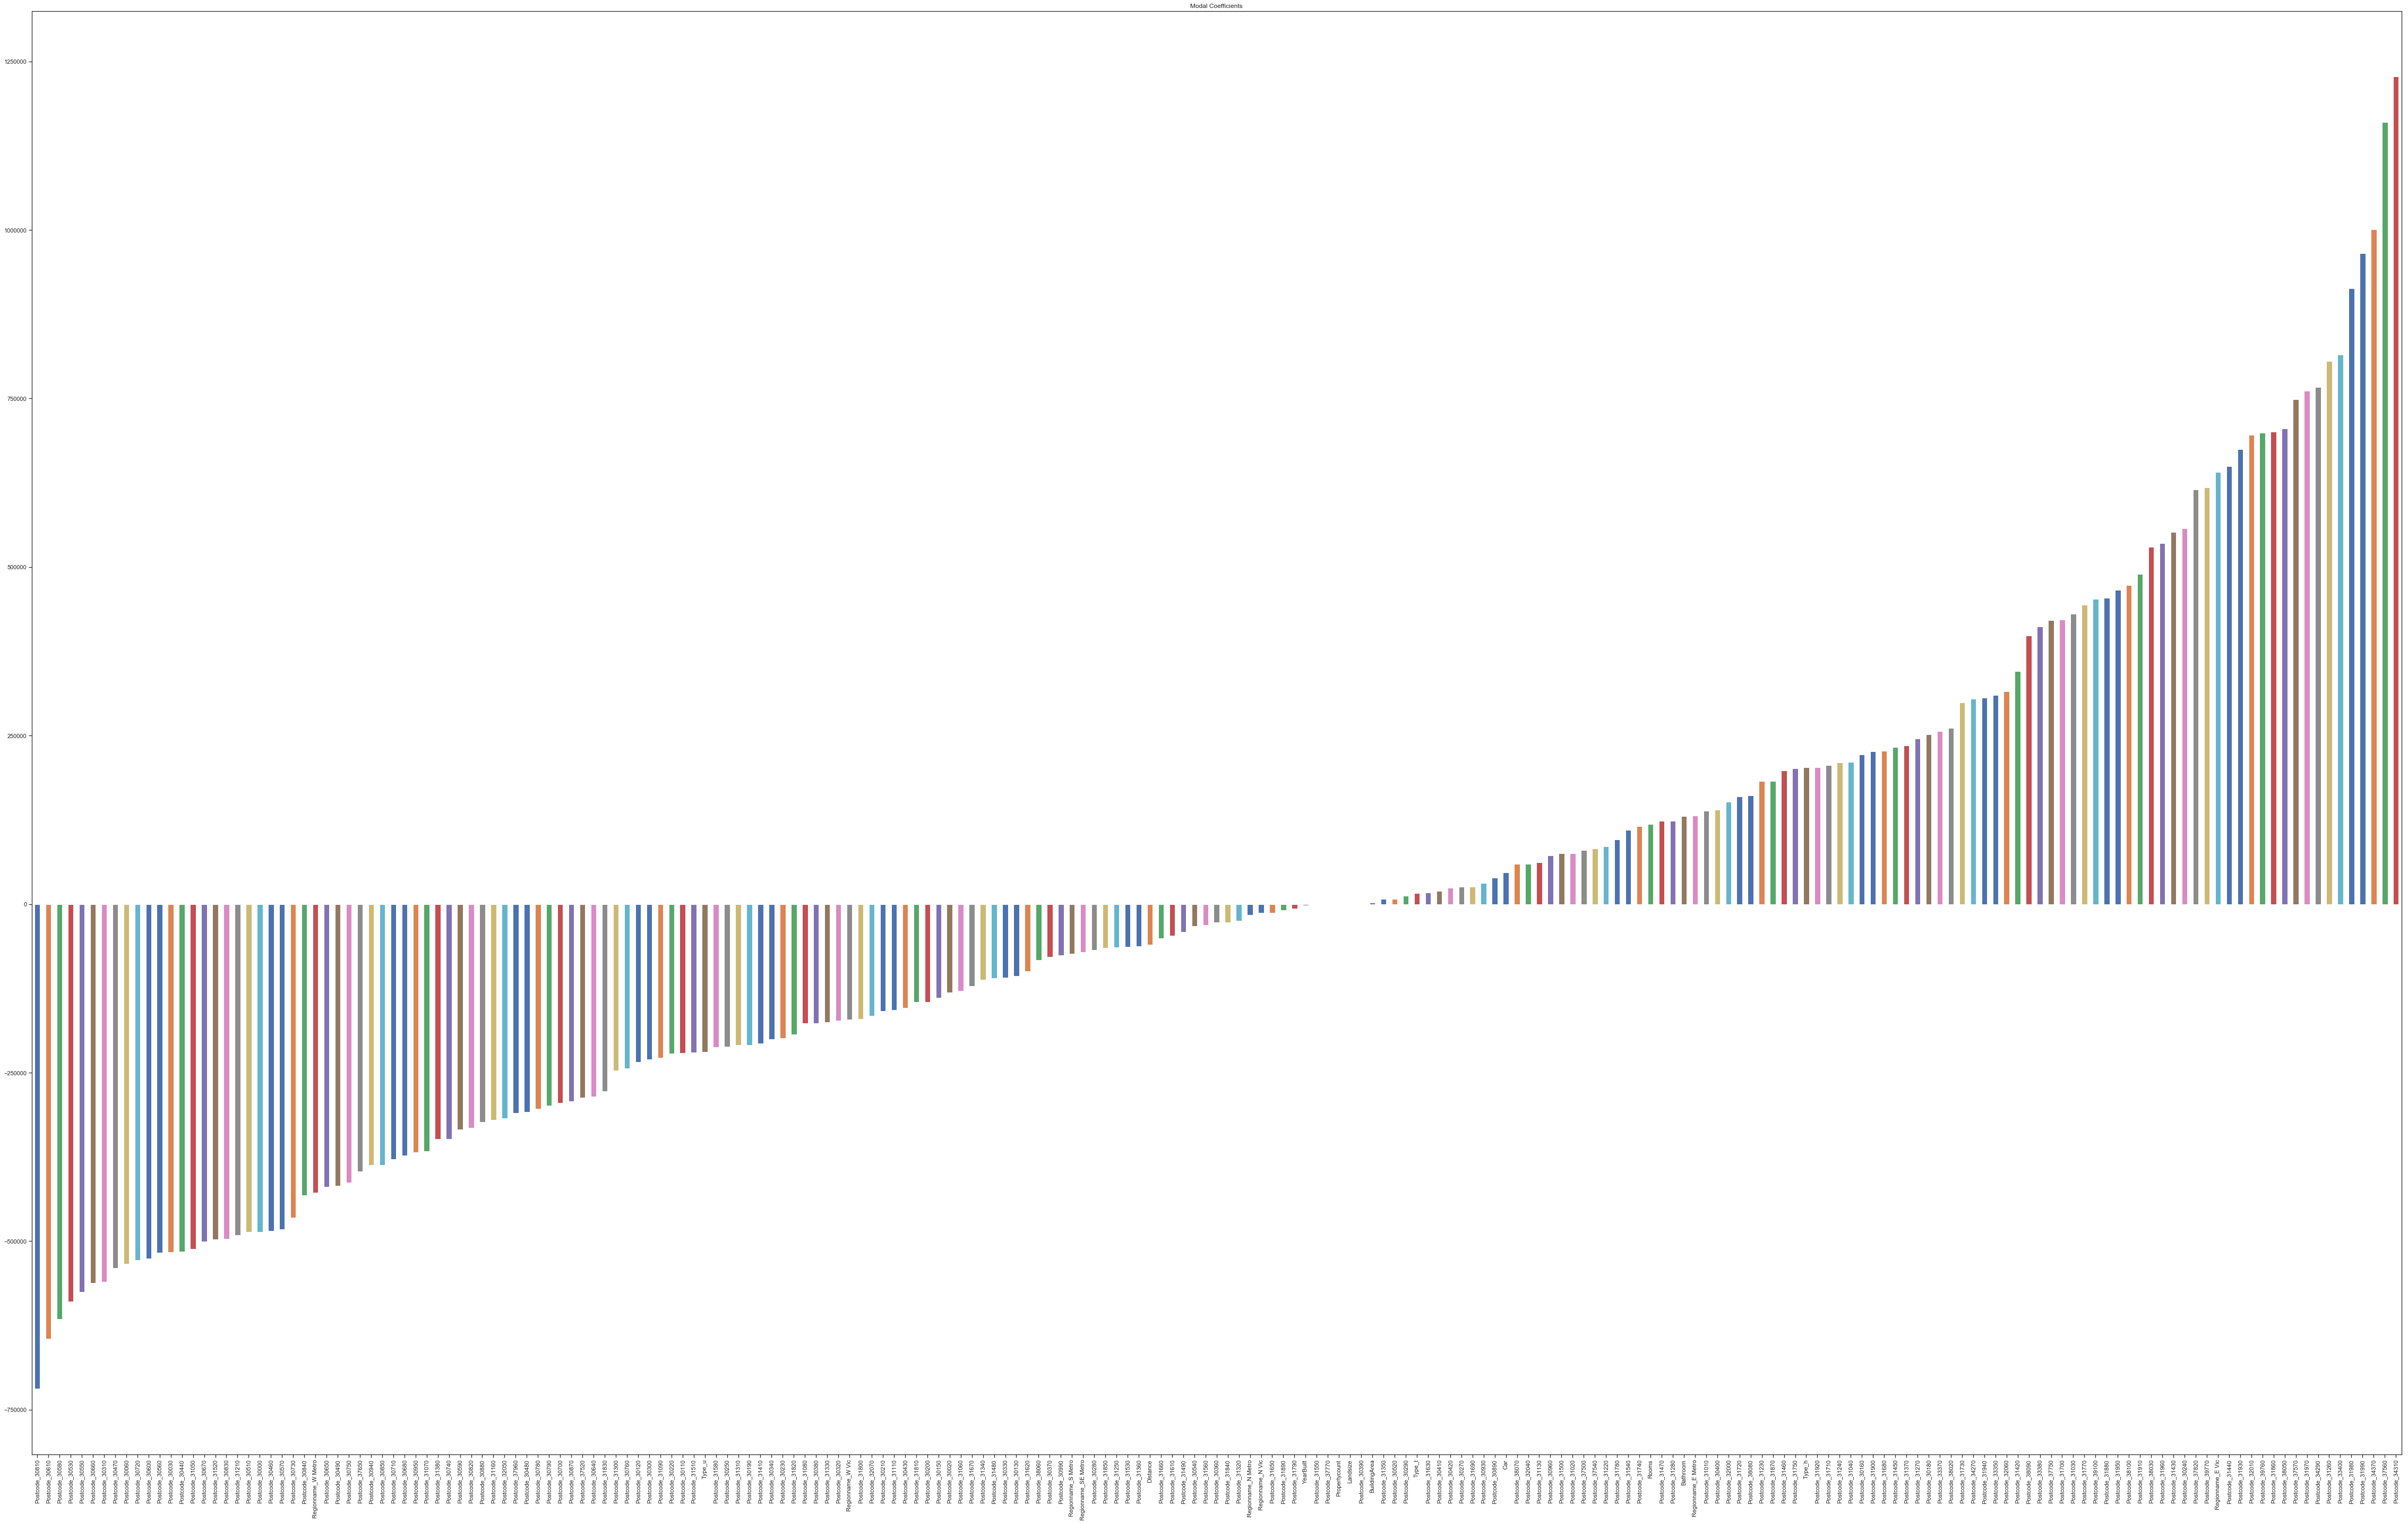

In [288]:
# checking the magnitude of coefficients
sns.set(style="ticks")
plt.figure(figsize=(80,50))
predictors = X.columns
coef = pd.Series(linreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

###  4.0. Model 2: Ridge Regression 

##### a. Importing and Fitting the Model 

In [289]:
from sklearn import linear_model
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
print('\nR-squared:')
print(ridge.score(X_train, y_train))


R-squared:
0.7268313958835351


#####  b. Coefficent Estimates 

In [290]:
# Creating dataframe for Coefficients
coeff_ridge = pd.DataFrame(X.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge.coef_)
coeff_ridge = coeff_ridge.rename(columns = {0:'Variables'})
coeff_ridge = coeff_ridge.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)
coeff_ridge.head()

,Variables,Coefficient Estimate
0,Postcode_31260,719531.777373
1,Postcode_31440,621794.175055
2,Postcode_31860,594819.791775
3,Postcode_31430,538885.890506
4,Postcode_30520,460283.408874


###  5.0. Model 3: Lasso Regression 

###### a. Importing and Fitting the Model 

In [291]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=200.0, fit_intercept=True, normalize=False, max_iter=500)
lasso.fit(X_train, y_train)
print('\nR-squared:')
print(lasso.score(X_train, y_train))


R-squared:
0.7223380004575946


##### Coefficent Estimates 

In [292]:
# Creating dataframe for Coefficients
coeff_lasso = pd.DataFrame(X.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lasso.coef_)
coeff_lasso = coeff_lasso.rename(columns = {0:'Variables'})
coeff_lasso = coeff_lasso.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)
coeff_lasso.head()

,Variables,Coefficient Estimate
0,Postcode_31260,698343.050182
1,Postcode_31440,610722.381207
2,Postcode_31860,606652.238434
3,Postcode_31430,524315.812149
4,Postcode_30540,435081.802647


###  6.0. Model 4: Random Forest 

In [293]:
# Assigning Features and Target Variables
X_rf = housing.loc[:, ~housing.columns.isin(['Suburb', 'Price','Postcode','Method', 'CouncilArea','Bedroom2','Type'\
                                         ,'Address', 'SellerG','Date','Lattitude', 'Longtitude', 'Regionname','day',\
                                            'month', 'year', 'Propertycount'])]
y_rf = housing['Price'] 

In [294]:
X_rf.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)

In [295]:
X_rf.shape

(8887, 212)

In [296]:
# Running Train Test Split

from sklearn.model_selection import train_test_split

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=0)

In [297]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_rf_train,y_rf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

##### 6.0.a. Feature Selection using Random Forest

In [298]:
# Creating a list of feature names
feature_labels = X_rf.columns

In [299]:
imp_features = rf.feature_importances_

In [300]:
# Print the name and importance of each feature
for feature in zip(feature_labels, rf.feature_importances_):
    print(feature)

('Rooms', 0.024880739466022775)
('Distance', 0.10605989054929152)
('Bathroom', 0.018416497806587388)
('Car', 0.011949072732398616)
('Landsize', 0.07764507507701154)
('BuildingArea', 0.3659732633949327)
('YearBuilt', 0.1267751395772046)
('Type_h', 0.008469702309100364)
('Type_t', 0.00047143586318085966)
('Type_u', 0.0058843205283004045)
('Postcode_30000', 2.4620452013126606e-05)
('Postcode_30020', 0.00020379077096128887)
('Postcode_30030', 0.00014117895726238345)
('Postcode_30060', 1.6664555135793517e-05)
('Postcode_30110', 0.0002758622700520099)
('Postcode_30120', 0.0002518604662590669)
('Postcode_30130', 9.951564106634808e-05)
('Postcode_30150', 0.0001251370500370225)
('Postcode_30160', 0.0015662365907118726)
('Postcode_30180', 0.0005105101718626853)
('Postcode_30190', 1.895382445645334e-05)
('Postcode_30200', 0.0001249612356400084)
('Postcode_30210', 2.6266762485171914e-05)
('Postcode_30220', 8.961094155518711e-07)
('Postcode_30230', 1.093413217668292e-05)
('Postcode_30240', 6.865422

In [301]:
imp_feat_list = pd.DataFrame(feature_labels)
imp_feat_list['Feature Importance'] = pd.Series(imp_features)
imp_feat_list = imp_feat_list.rename(columns = {0:'Variables'})
imp_feat_list = imp_feat_list.sort_values(by=["Feature Importance"], ascending=False).reset_index(drop=True)

In [302]:
imp_feat_list.head(10)

,Variables,Feature Importance
0,BuildingArea,0.365973
1,Regionname_S Metro,0.172816
2,YearBuilt,0.126775
3,Distance,0.106060
4,Landsize,0.077645
5,Rooms,0.024881
6,Regionname_E Metro,0.019726
7,Bathroom,0.018416
8,Car,0.011949
9,Type_h,0.008470


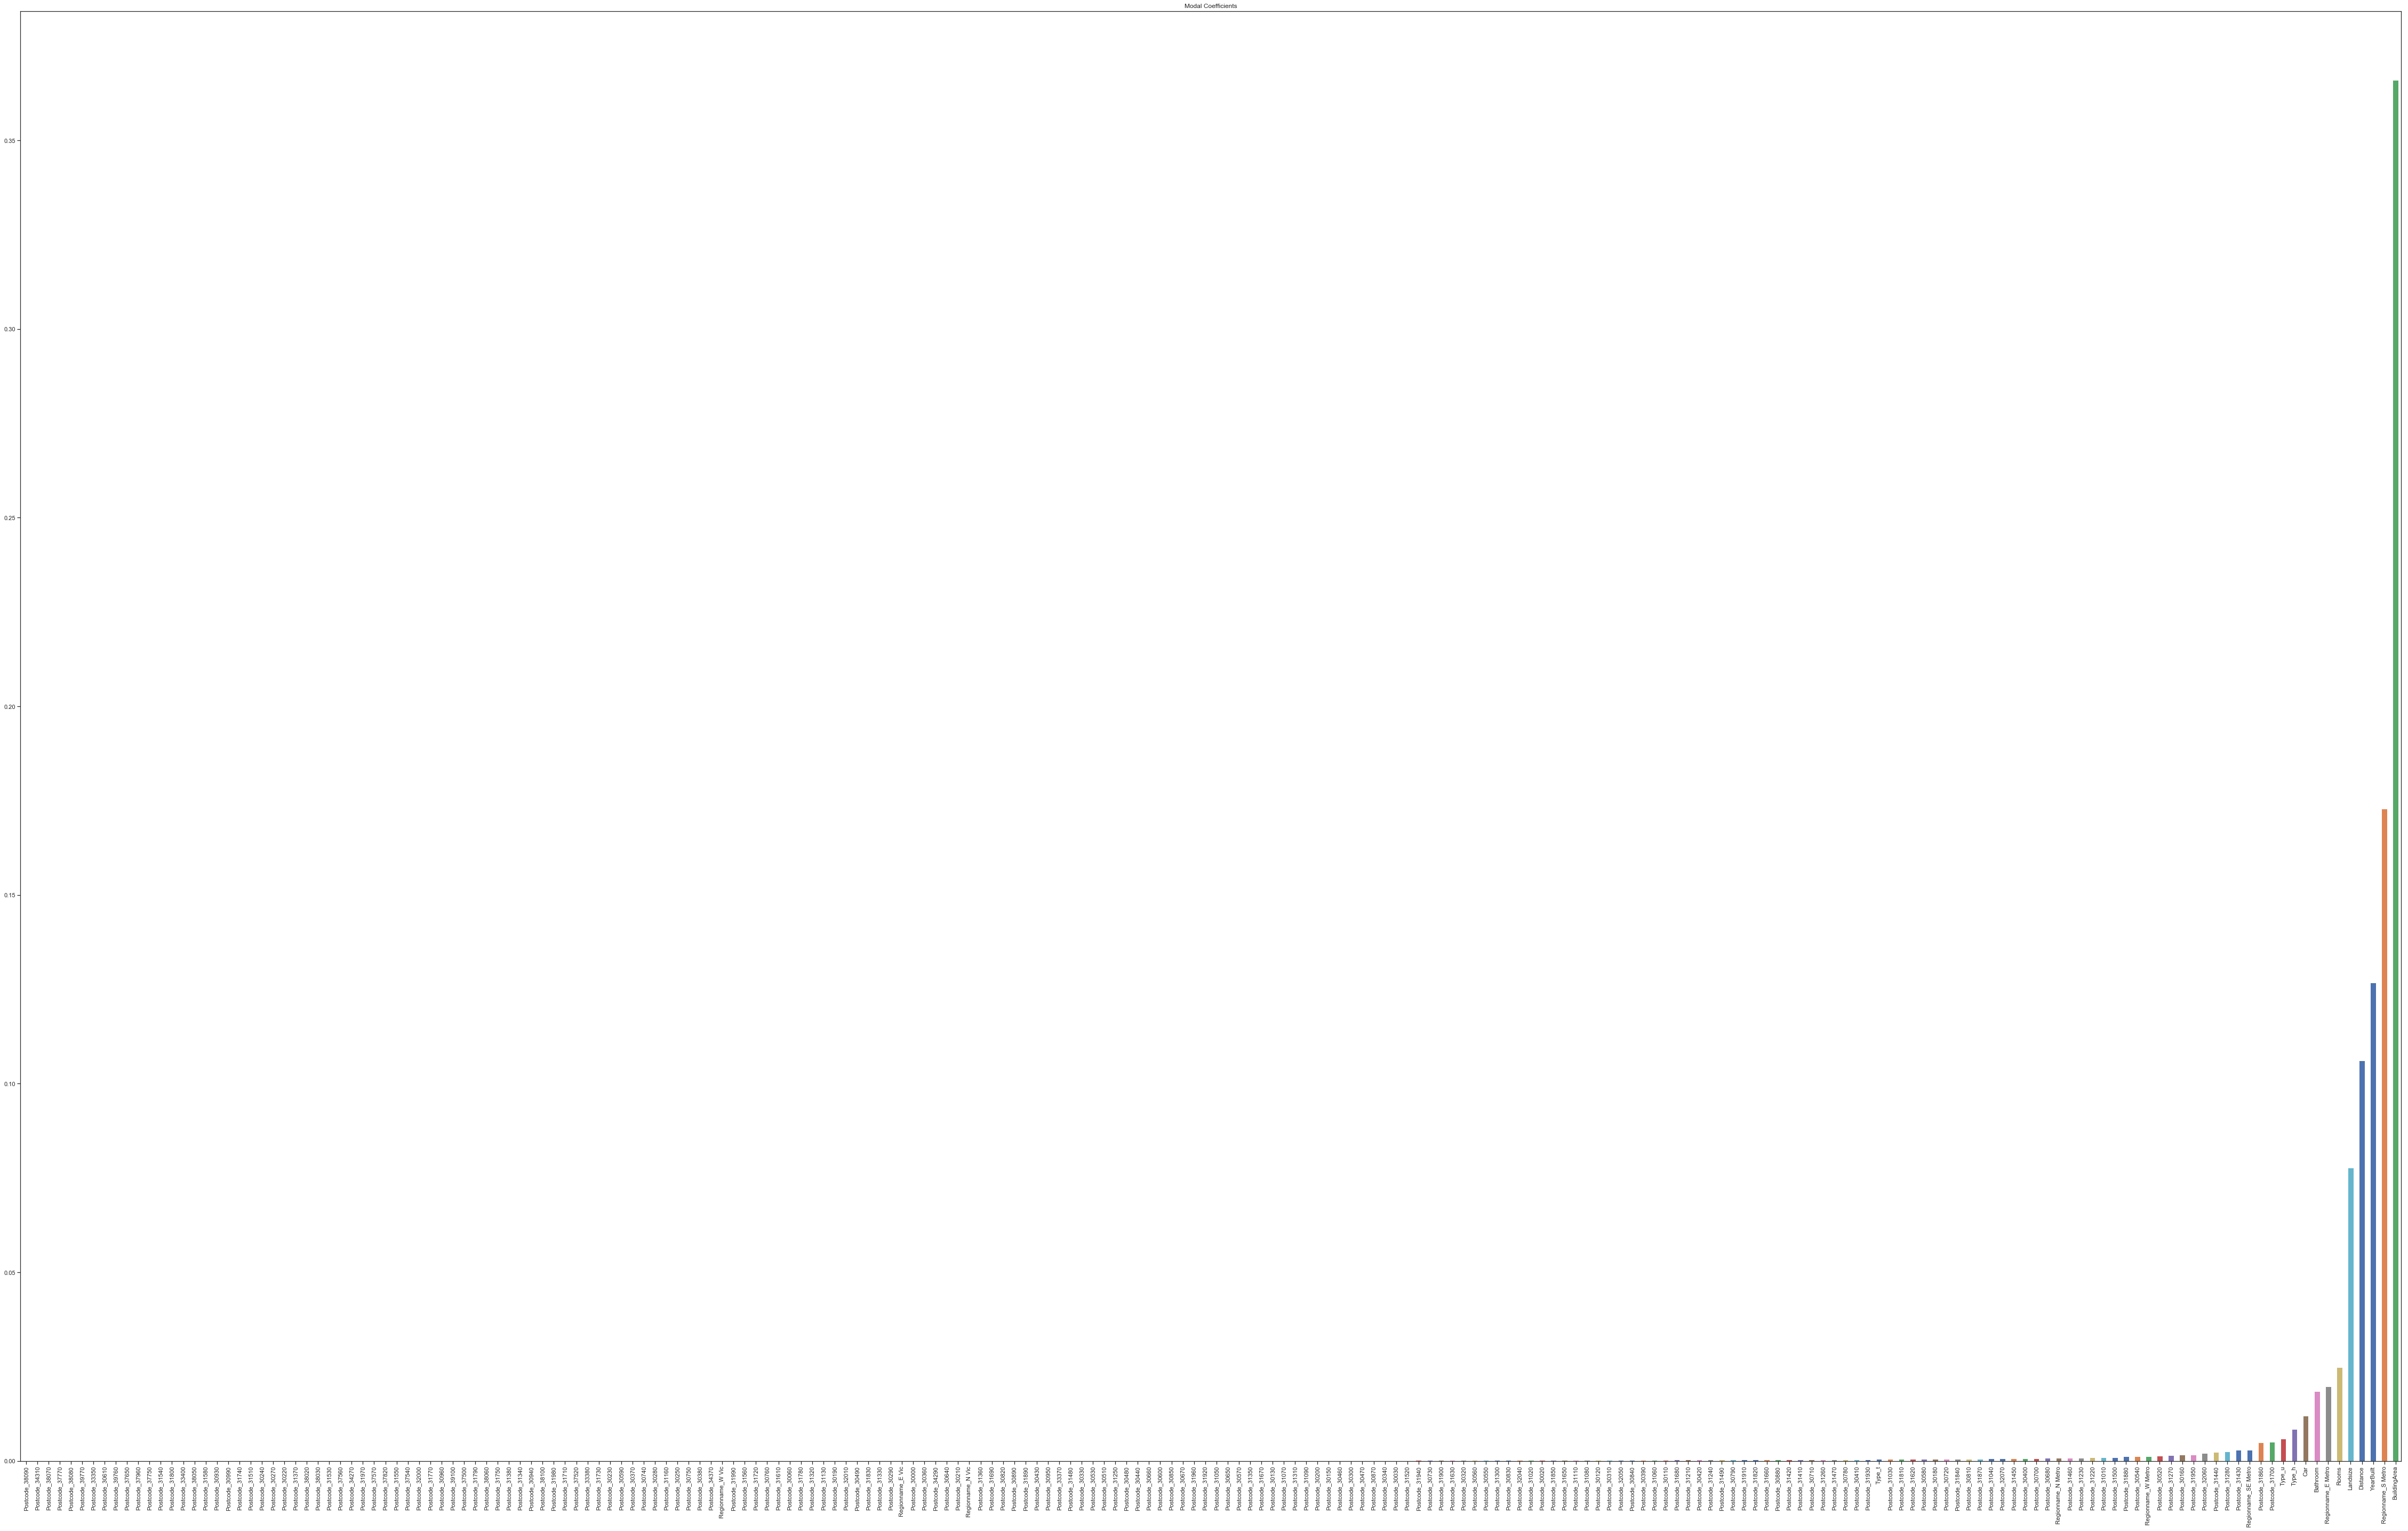

In [303]:
# checking the magnitude of coefficients
sns.set(style="ticks")
plt.figure(figsize=(80,50))
predictors = X_rf.columns
coef = pd.Series(rf.feature_importances_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

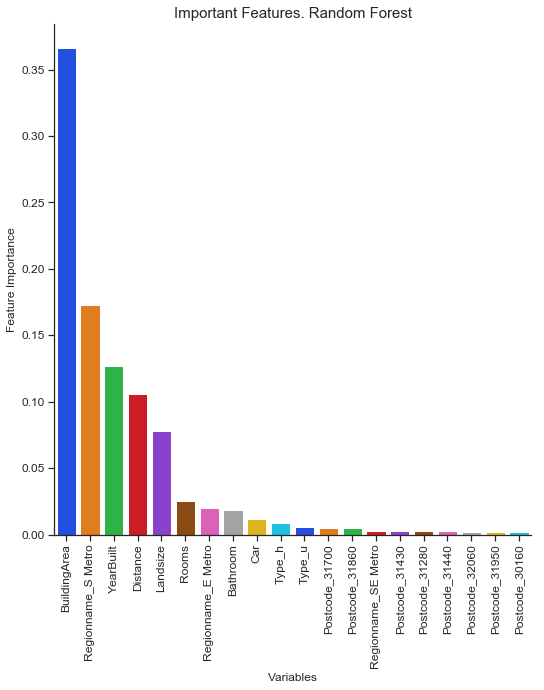

In [341]:
# Highest 10 values for Coefficents
highest = imp_feat_list.nlargest(20, 'Feature Importance')

sns.set(style="ticks")

g = sns.catplot(x='Variables', y='Feature Importance', data=highest,
                   height=8, kind="bar", palette="bright", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=90, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('Important Features. Random Forest',fontsize=15)
plt.show()

In [342]:
imp_feat_list.tail(10).reset_index()

,index,Variables,Feature Importance
0,202,Postcode_37650,2.842573e-08
1,203,Postcode_39760,1.644759e-08
2,204,Postcode_30610,1.206926e-08
3,205,Postcode_33350,5.826781e-10
4,206,Postcode_39770,5.246907e-10
5,207,Postcode_37770,0.000000e+00
6,208,Postcode_38090,0.000000e+00
7,209,Postcode_34310,0.000000e+00
8,210,Postcode_38080,0.000000e+00
9,211,Postcode_38070,0.000000e+00


In [326]:
# plotting mean building area for different regions
lowest = imp_feat_list.nsmallest(20, 'Feature Importance')

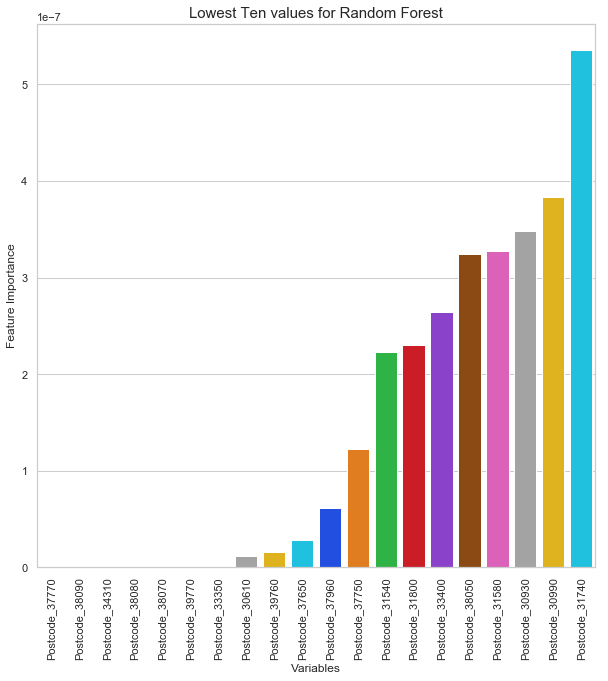

In [339]:
# Lowest 10 values for Coefficents (barplot)
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

a = sns.barplot(x='Variables', y='Feature Importance', data=lowest, palette='bright')
plt.ylim()
plt.title('Lowest Ten values for Random Forest',fontsize=15)

for item in a.get_xticklabels():
    item.set_rotation(90)
    
plt.show()

##### b. Importing SelectFromModel and setting up threshold

In [307]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.000877

sfm = SelectFromModel(rf, threshold=0.008309)

In [308]:
# Train the selector, feeding origonal variables
sfm.fit(X_rf_train,y_rf_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.008309)

##### c. Transforming Features

In [309]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

Rooms
Distance
Bathroom
Car
Landsize
BuildingArea
YearBuilt
Type_h
Regionname_E Metro
Regionname_S Metro


In [310]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_imp_rf_train = sfm.transform(X_rf_train)
X_imp_rf_test = sfm.transform(X_rf_test)

##### d. Creating a new RandomForestRegressor based on transformed features

In [311]:
# Creating a new random forest classifier for the most important features
rf_imp = RandomForestRegressor()

# Train the new classifier on the new dataset containing the most important features
rf_imp.fit(X_imp_rf_train, y_rf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### 7.0. ACCURACY COMPARISON

##### a. Regular Model

In [312]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Test Data
y_pred = rf.predict(X_rf_test)

In [313]:
print('Regular Model R²:', rf.score(X_rf_train,y_rf_train))

Regular Model R²: 0.9650189279642731


In [314]:
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_rf_test, y_pred)))
print ("Mean Squared Error: {}".format(metrics.mean_squared_error(y_rf_test, y_pred)))
print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_rf_test, y_pred))))

Mean Absolute Error: 177618.57283464566
Mean Squared Error: 99468523184.78862
Root Mean Squared Error: 315386.3078587728


##### b. Updated Model with Important Features

In [315]:
# Apply The Full Featured Classifier To The Test Data
y_imp_pred = rf_imp.predict(X_imp_rf_test)

In [316]:
print('Regular Model R²:', rf_imp.score(X_imp_rf_train, y_rf_train))

Regular Model R²: 0.9572978076389496


In [317]:
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_rf_test, y_imp_pred)))
print ("Mean Squared Error: {}".format(metrics.mean_squared_error(y_rf_test, y_imp_pred)))
print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_rf_test, y_imp_pred))))

Mean Absolute Error: 195071.62868391455
Mean Squared Error: 114272588935.20444
Root Mean Squared Error: 338042.2886788049


### 7.0. RUNNING OTHER MODELS WITH NEWLY SELECTED FEATURES

In [318]:
# X_new = X[list(imp_feat_list['Variables'].head(20))]

In [319]:
X_new = X[['Rooms','Distance','Bathroom','Car','Landsize', 'BuildingArea','YearBuilt','Type_h', 'Regionname_E Metro'\
         , 'Regionname_S Metro']]

y_new = housing['Price']

In [320]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

#####  7.1. Linear Regression 

In [321]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_new, y_train_new)

print('\nR²:',linreg.score(X_train_new, y_train_new))


R²: 0.6332950259469989


##### 7.2. Ridge Regression

In [322]:
from sklearn import linear_model
ridge = linear_model.Ridge()
ridge.fit(X_train_new, y_train_new)
print('\nR-squared:')
print(ridge.score(X_train_new, y_train_new))


R-squared:
0.6332949004447042


#### 7.3. Lasso Regression 

In [323]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=5.0, fit_intercept=True, normalize=False)
lasso.fit(X_train_new, y_train_new)
print('\nR-squared:')
print(lasso.score(X_train_new, y_train_new))


R-squared:
0.6332950240766145


In [324]:
# Notice that R^2 has dropped in linear, ridge and lesso dues to less features.
# Earlier average values R²: 0.7278989701924363
# Should you use K fold cross validation?
# How to deal with following Error if no null values are removed